# - Introduction

# We aim to accomplist the following for this study:

1. Identify and visualize which factors contribute to customer churn:
    
2. Build a prediction model that will perform the following:
    - Classify if a customer is going to churn or not
    - Preferably and based on model performance, choose a model that will attach a probability to the         churn to make it easier for customer service to target low hanging fruits in their efforts to           prevent churn

#  Dataset

- **RowNumber:** corresponds to the record (row) number and has no effect on the output.
- **CustomerId:** contains random values and has no effect on customer leaving the bank.
- **Surname:** the surname of a customer has no impact on their decision to leave the bank.
- **CreditScore:** can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography:** a customer’s location can affect their decision to leave the bank.
- **Gender:** it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age:** this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure:** refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance:** also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts:** refers to the number of products that a customer has purchased through the bank.
- **HasCrCard:** denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember:** active customers are less likely to leave the bank.
- **EstimatedSalary:** as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited:** whether or not the customer left the bank.  (0=No,1=Yes)

** Data set review & preparation   

In this section we will seek to explore the structure of our data:

- To understand the input space the data set
- And to prepare the sets for exploratory and prediction tasks as described

# Step 1: Import The key Libraries

In [156]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-prediction-bank/Churn_Modelling.csv


In [157]:
# loading necessary libraries
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [158]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/colab/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2: Read the DataSet

In [160]:
bankdf = pd.read_csv('/kaggle/input/customer-churn-prediction-bank/Churn_Modelling.csv')
print("Full train dataset shape is {}".format(bankdf.shape))

Full train dataset shape is (10000, 14)


- The bankdf has 1000 rows with 14 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

# Step 3. Basic Data View / Exploration

In [161]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# observation:¶
- we could understand that here there is no missing values exists in this dataset

In [162]:
bankdf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [163]:
bankdf.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

- So we moslty have categorical variables and 5 continuous variables

In [164]:
bankdf.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9658,9659,15712264,Plumb,713,France,Female,39,10,0.00,2,1,1,126263.97,0
9113,9114,15760662,Francis,521,Germany,Female,29,2,87212.80,1,1,1,994.86,0
8267,8268,15798737,Chao,654,France,Male,38,8,0.00,2,1,0,88659.44,0
6122,6123,15577313,Lionel,619,France,Male,44,3,116967.68,1,1,0,5075.17,1
4048,4049,15653715,Coates,602,France,Female,63,7,0.00,2,1,1,56323.21,0
9389,9390,15756954,Lombardo,538,France,Female,32,2,0.00,1,1,1,80130.54,0
7294,7295,15623668,Johnson,653,Germany,Male,31,2,154741.45,2,0,0,25183.01,0
1568,1569,15618314,Chu,676,France,Male,40,8,114005.78,1,1,1,67998.45,0
7614,7615,15725002,Smith,749,France,Male,37,7,0.00,2,1,0,20306.79,0
2016,2017,15633612,Yuryeva,696,France,Male,28,4,172646.82,1,1,1,116471.43,0


In [165]:
print("\n Dataset.columns")
print(bankdf.columns)


 Dataset.columns
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [166]:
bankdf.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [167]:
# convert string values 'yes' and 'no' to numeric values '1' and '0' in churn column because of our ML model
bankdf.loc[bankdf.Exited == 'Yes','Exited'] = 1
bankdf.loc[bankdf.Exited == 'No','Exited'] = 0

In [168]:
# Find the percentage of missing values 
bankdf.isnull().sum()/bankdf.shape[0]*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [169]:
# Finding the duplicates
bankdf.duplicated().sum()

0

In [170]:
bankdf.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# step 4: Data preprocessing - clean
1. Missing value handling is not required
2. drop unwanted

- From the above, we will not require the first 2 attributes as the are specific to a customer. It is borderline with the surname as this would result to profiling so we exclude this as well.

In [171]:
# Drop the columns as explained above
bankdf = bankdf.drop(["RowNumber", "Surname"], axis = 1)

In [172]:
# Review the top rows of what is left of the data frame
bankdf.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# observation
- 1. Find the Descriptive Statistics:
- 2. Calculate mean, median, and standard deviation of severity levels.

In [173]:
print("\nDataset Descriptive Statistics:")
print(bankdf.describe())


Dataset Descriptive Statistics:
         CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584   

In [174]:
# categorical Variables
categorical_variables = [col for col in bankdf.columns if col in "O"
                        or bankdf[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [175]:
# Numeric Variables
numeric_variables = [col for col in bankdf.columns if bankdf[col].dtype != "object"
                        and bankdf[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Exited (Dependent Variable)

In [176]:
# Frequency of classes of dependent variable
bankdf["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [177]:
# Customers leaving the bank
churn = bankdf.loc[bankdf["Exited"]==1]

In [178]:
# Customers who did not leave the bank
not_churn = bankdf.loc[bankdf["Exited"]==0]

# Categorical Variables

- Tenure

In [179]:
# Frequency of not_churn group according to Tenure
not_churn["Tenure"].value_counts().sort_values()

Tenure
0     318
10    389
6     771
9     771
4     786
3     796
1     803
5     803
8     828
2     847
7     851
Name: count, dtype: int64

In [180]:
# Frequency of churn group according to Tenure
churn["Tenure"].value_counts().sort_values()

Tenure
0      95
10    101
7     177
6     196
8     197
2     201
4     203
5     209
3     213
9     213
1     232
Name: count, dtype: int64

# NumOfProducts

In [181]:
# Frequency of not_churn group according to NumOfProducts
not_churn["NumOfProducts"].value_counts().sort_values()

NumOfProducts
3      46
1    3675
2    4242
Name: count, dtype: int64

In [182]:
# Frequency of churn group according to NumOfProducts
churn["NumOfProducts"].value_counts().sort_values()

NumOfProducts
4      60
3     220
2     348
1    1409
Name: count, dtype: int64

# HasCrCard

In [183]:
# examining the HasCrCard of the not_churn group
not_churn["HasCrCard"].value_counts()

HasCrCard
1    5631
0    2332
Name: count, dtype: int64

In [184]:
# examining the HasCrCard of the churn group
churn["HasCrCard"].value_counts()

HasCrCard
1    1424
0     613
Name: count, dtype: int64

# IsActiveMember

In [185]:
# examining the IsActiveMember of the not_churn group
not_churn["IsActiveMember"].value_counts()

IsActiveMember
1    4416
0    3547
Name: count, dtype: int64

In [186]:
# examining the IsActiveMember of the churn group
churn["IsActiveMember"].value_counts()

IsActiveMember
0    1302
1     735
Name: count, dtype: int64

# Geography

In [187]:
# Frequency of not_churn group according to Geography
not_churn.Geography.value_counts().sort_values()

Geography
Germany    1695
Spain      2064
France     4204
Name: count, dtype: int64

In [188]:
# Frequency of churn group according to Geography
churn.Geography.value_counts().sort_values()

Geography
Spain      413
France     810
Germany    814
Name: count, dtype: int64

# Gender

In [189]:
# Frequency of not_churn group according to Gender
not_churn.Gender.value_counts()

Gender
Male      4559
Female    3404
Name: count, dtype: int64

In [190]:
# Frequency of churn group according to Gender
churn.Gender.value_counts()

Gender
Female    1139
Male       898
Name: count, dtype: int64

# Step 5: EDA (Explorative Data Analytics)
- Conduct exploratory data analysis (EDA) to understand the dataset’s structure and identify key patterns and correlations

- Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status

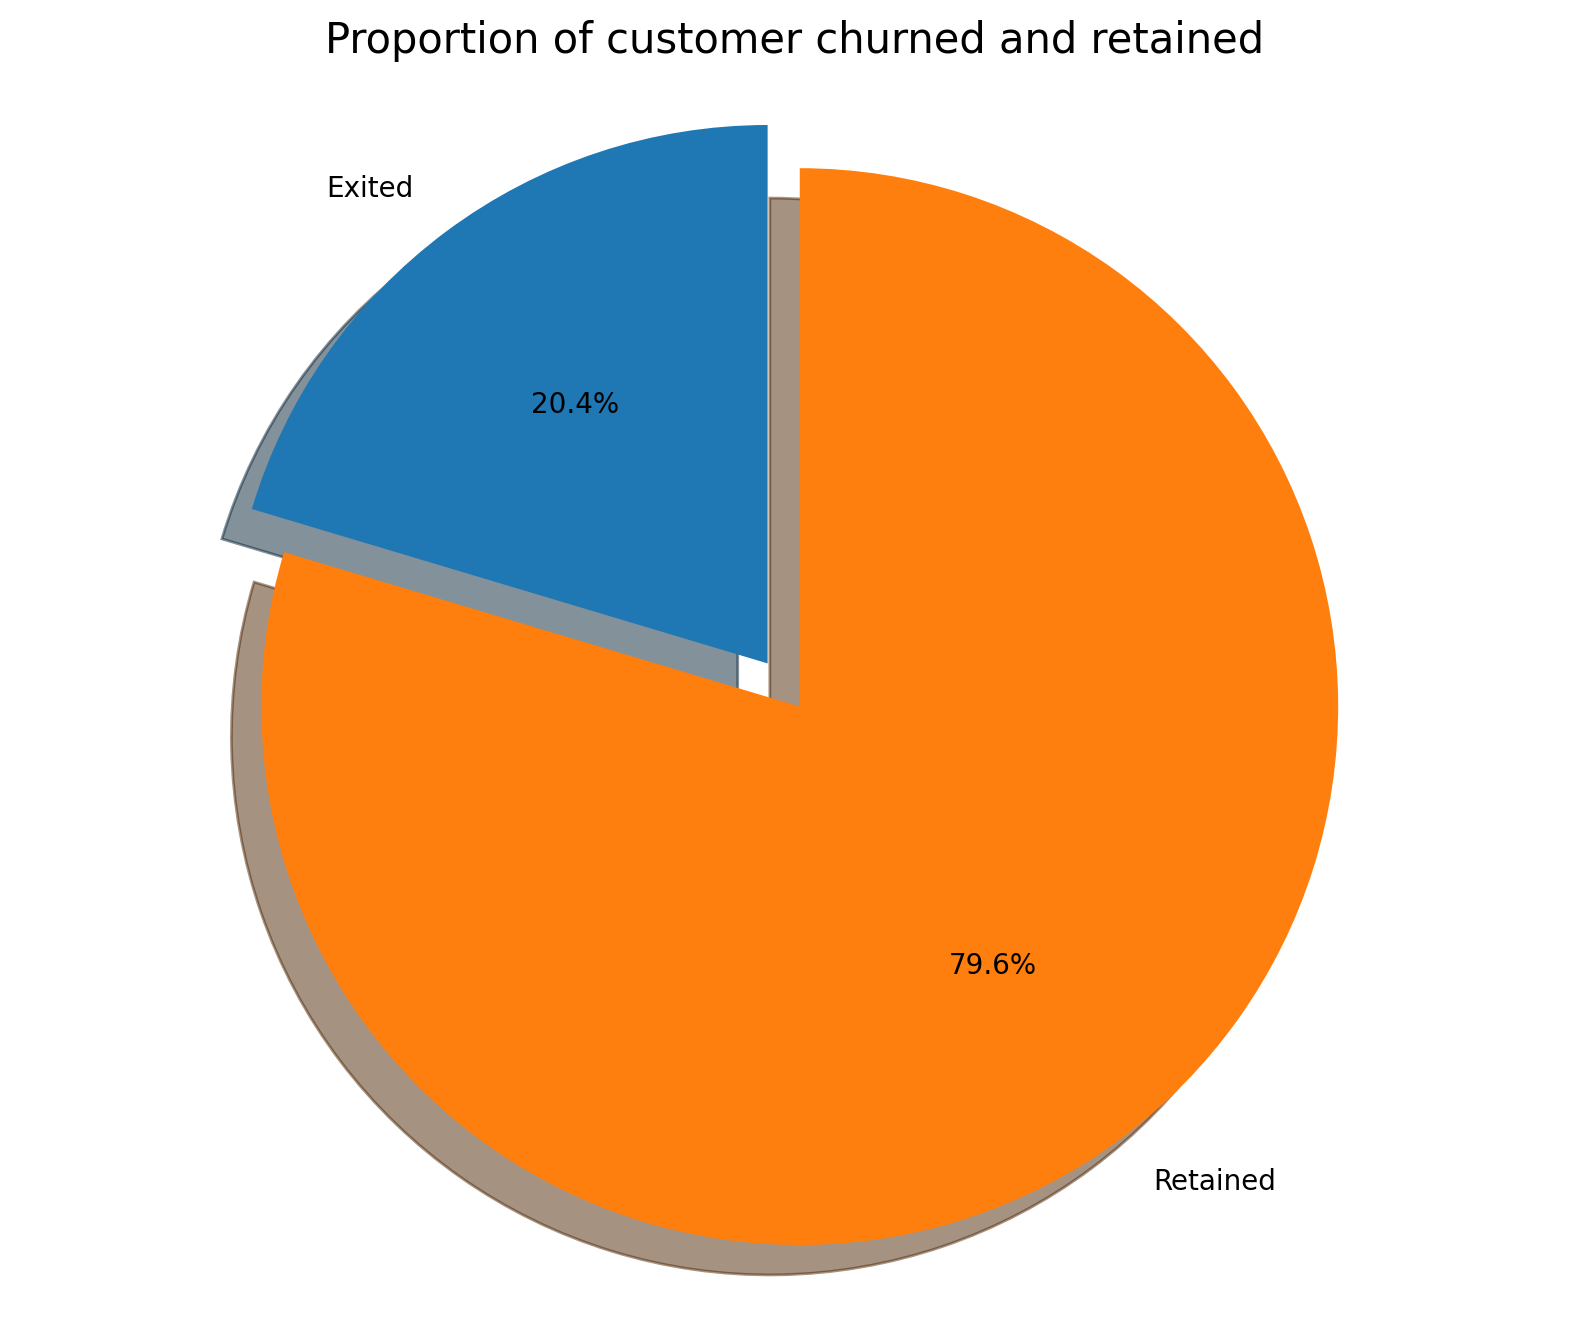

In [191]:
labels = 'Exited', 'Retained'
sizes = [bankdf.Exited[bankdf['Exited']==1].count(), bankdf.Exited[bankdf['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 15)
plt.show()

- So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

<Axes: xlabel='IsActiveMember', ylabel='count'>

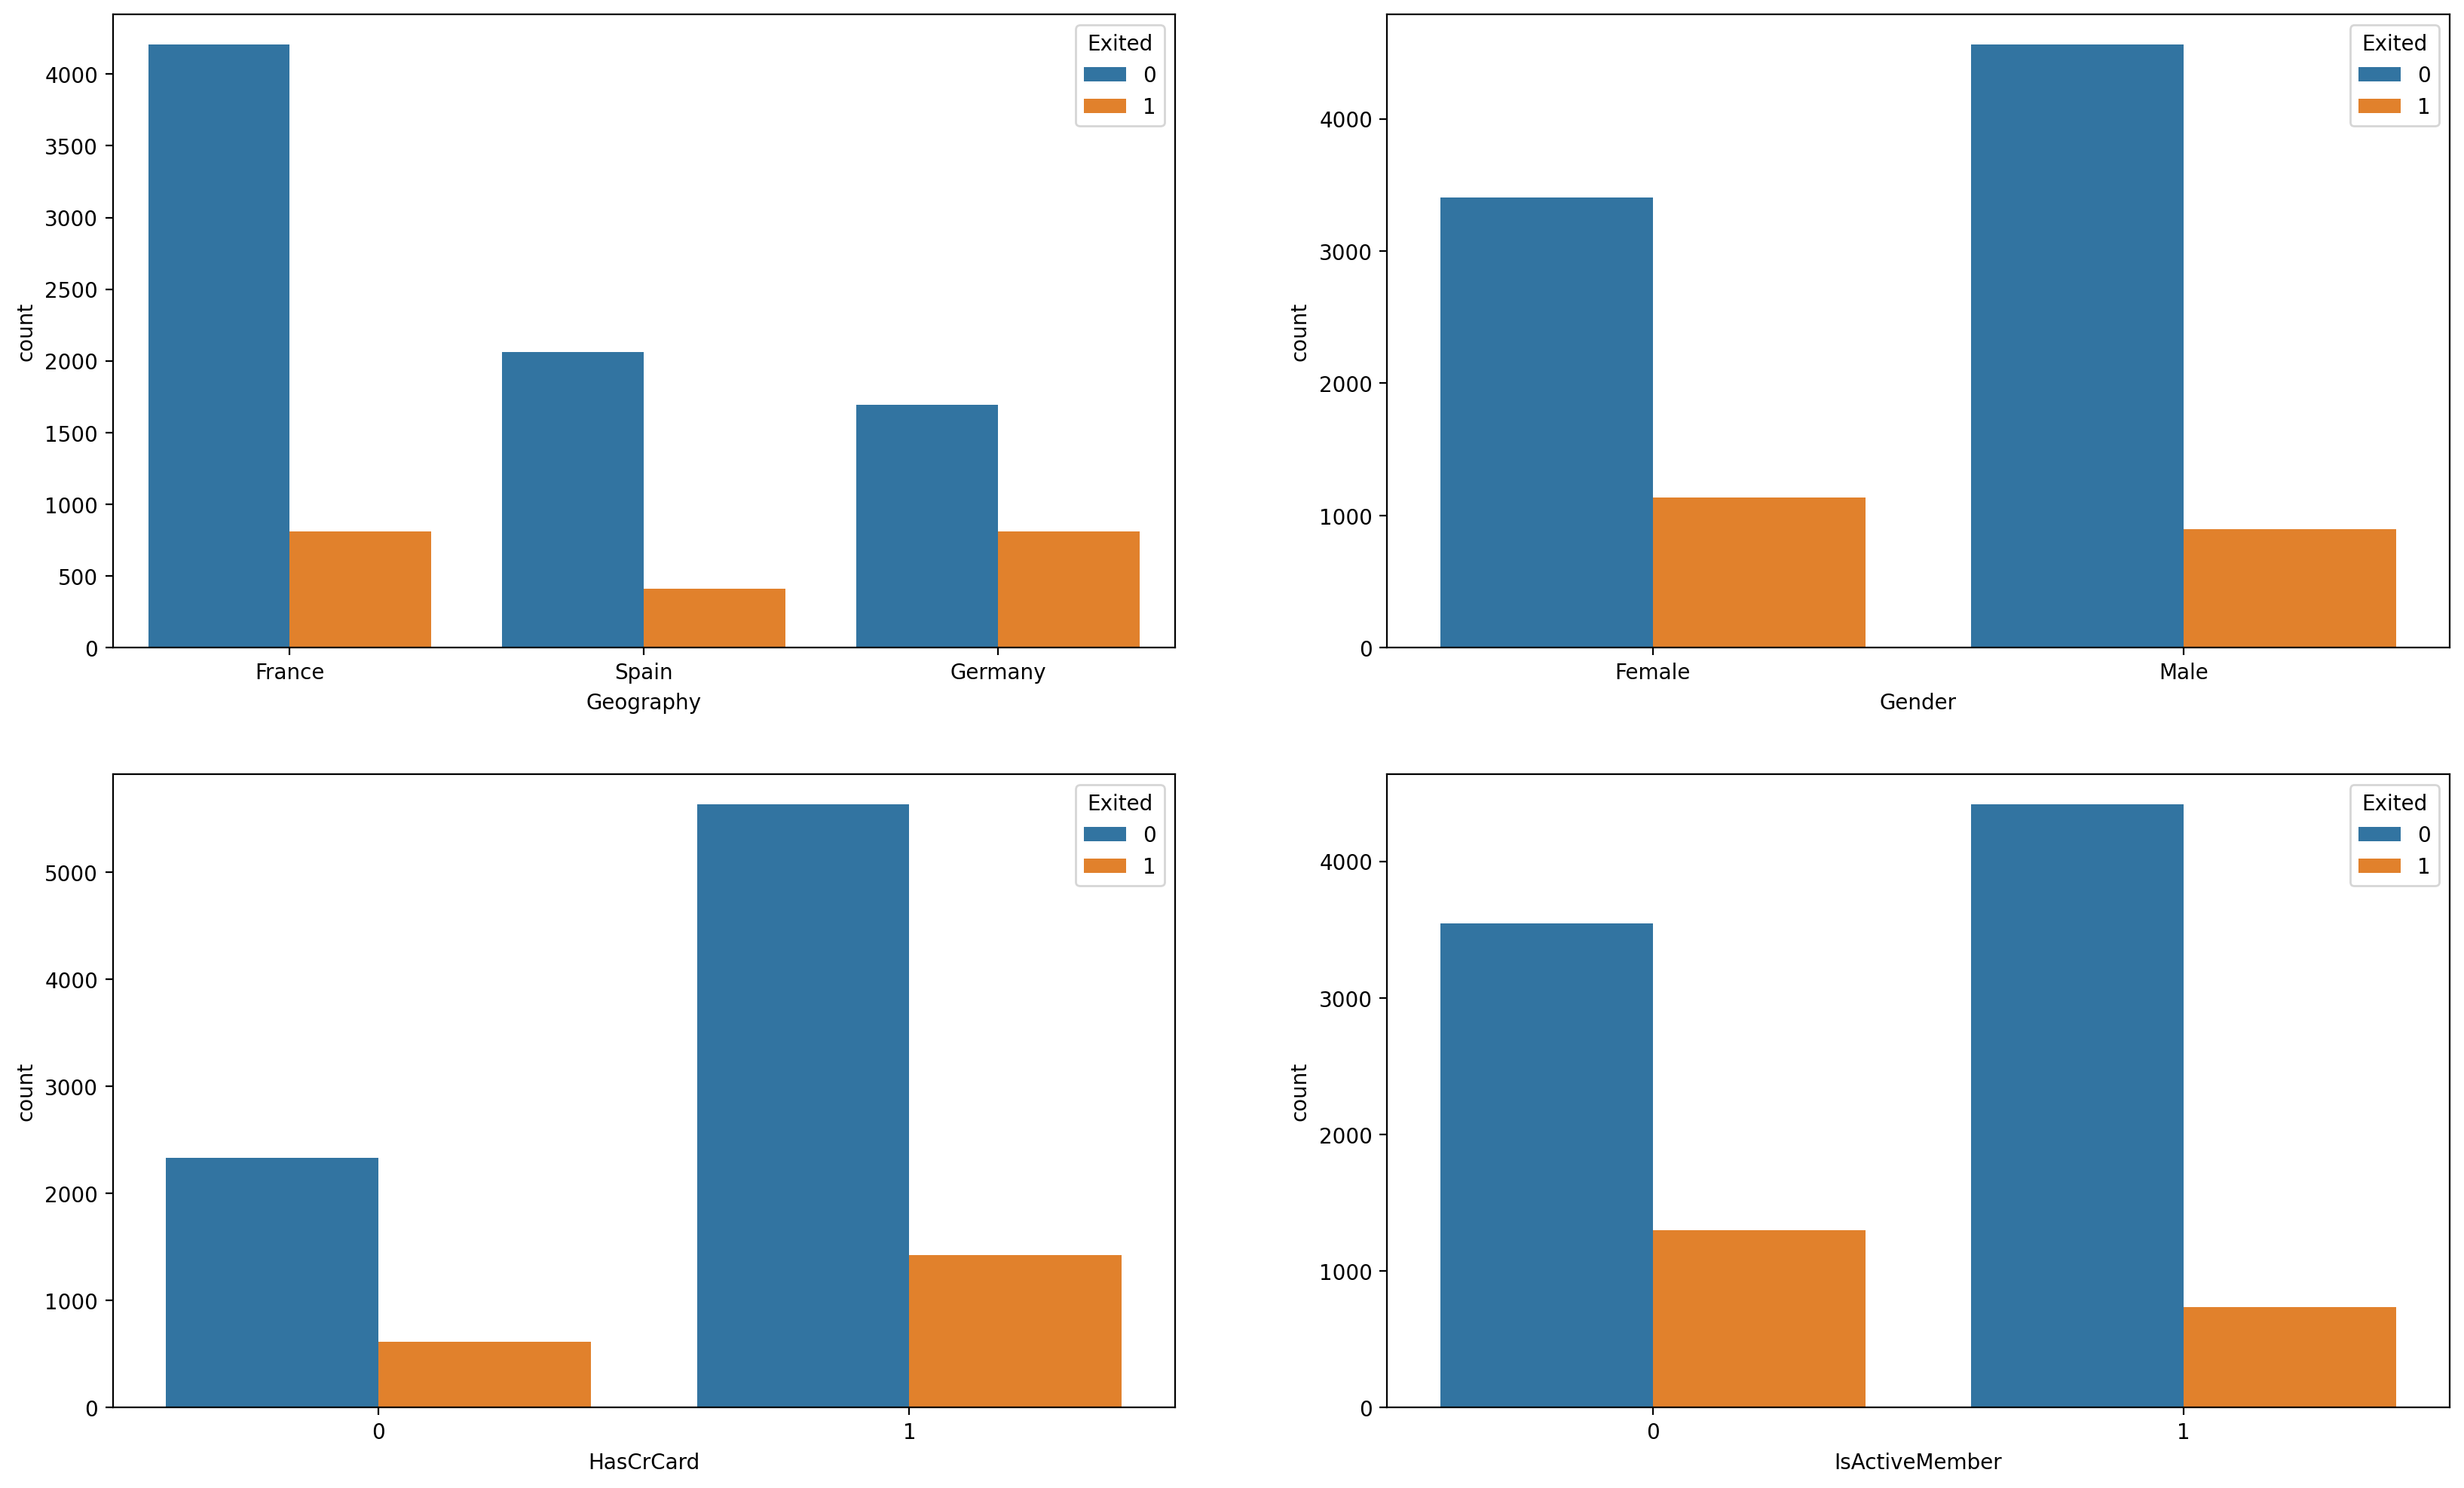

In [192]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = bankdf , ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = bankdf, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = bankdf, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = bankdf, ax=axarr[1][1])

We note the following:
-  Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
-  The proportion of female customers churning is also greater than that of male customers
-  Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence. 
-  Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.


<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

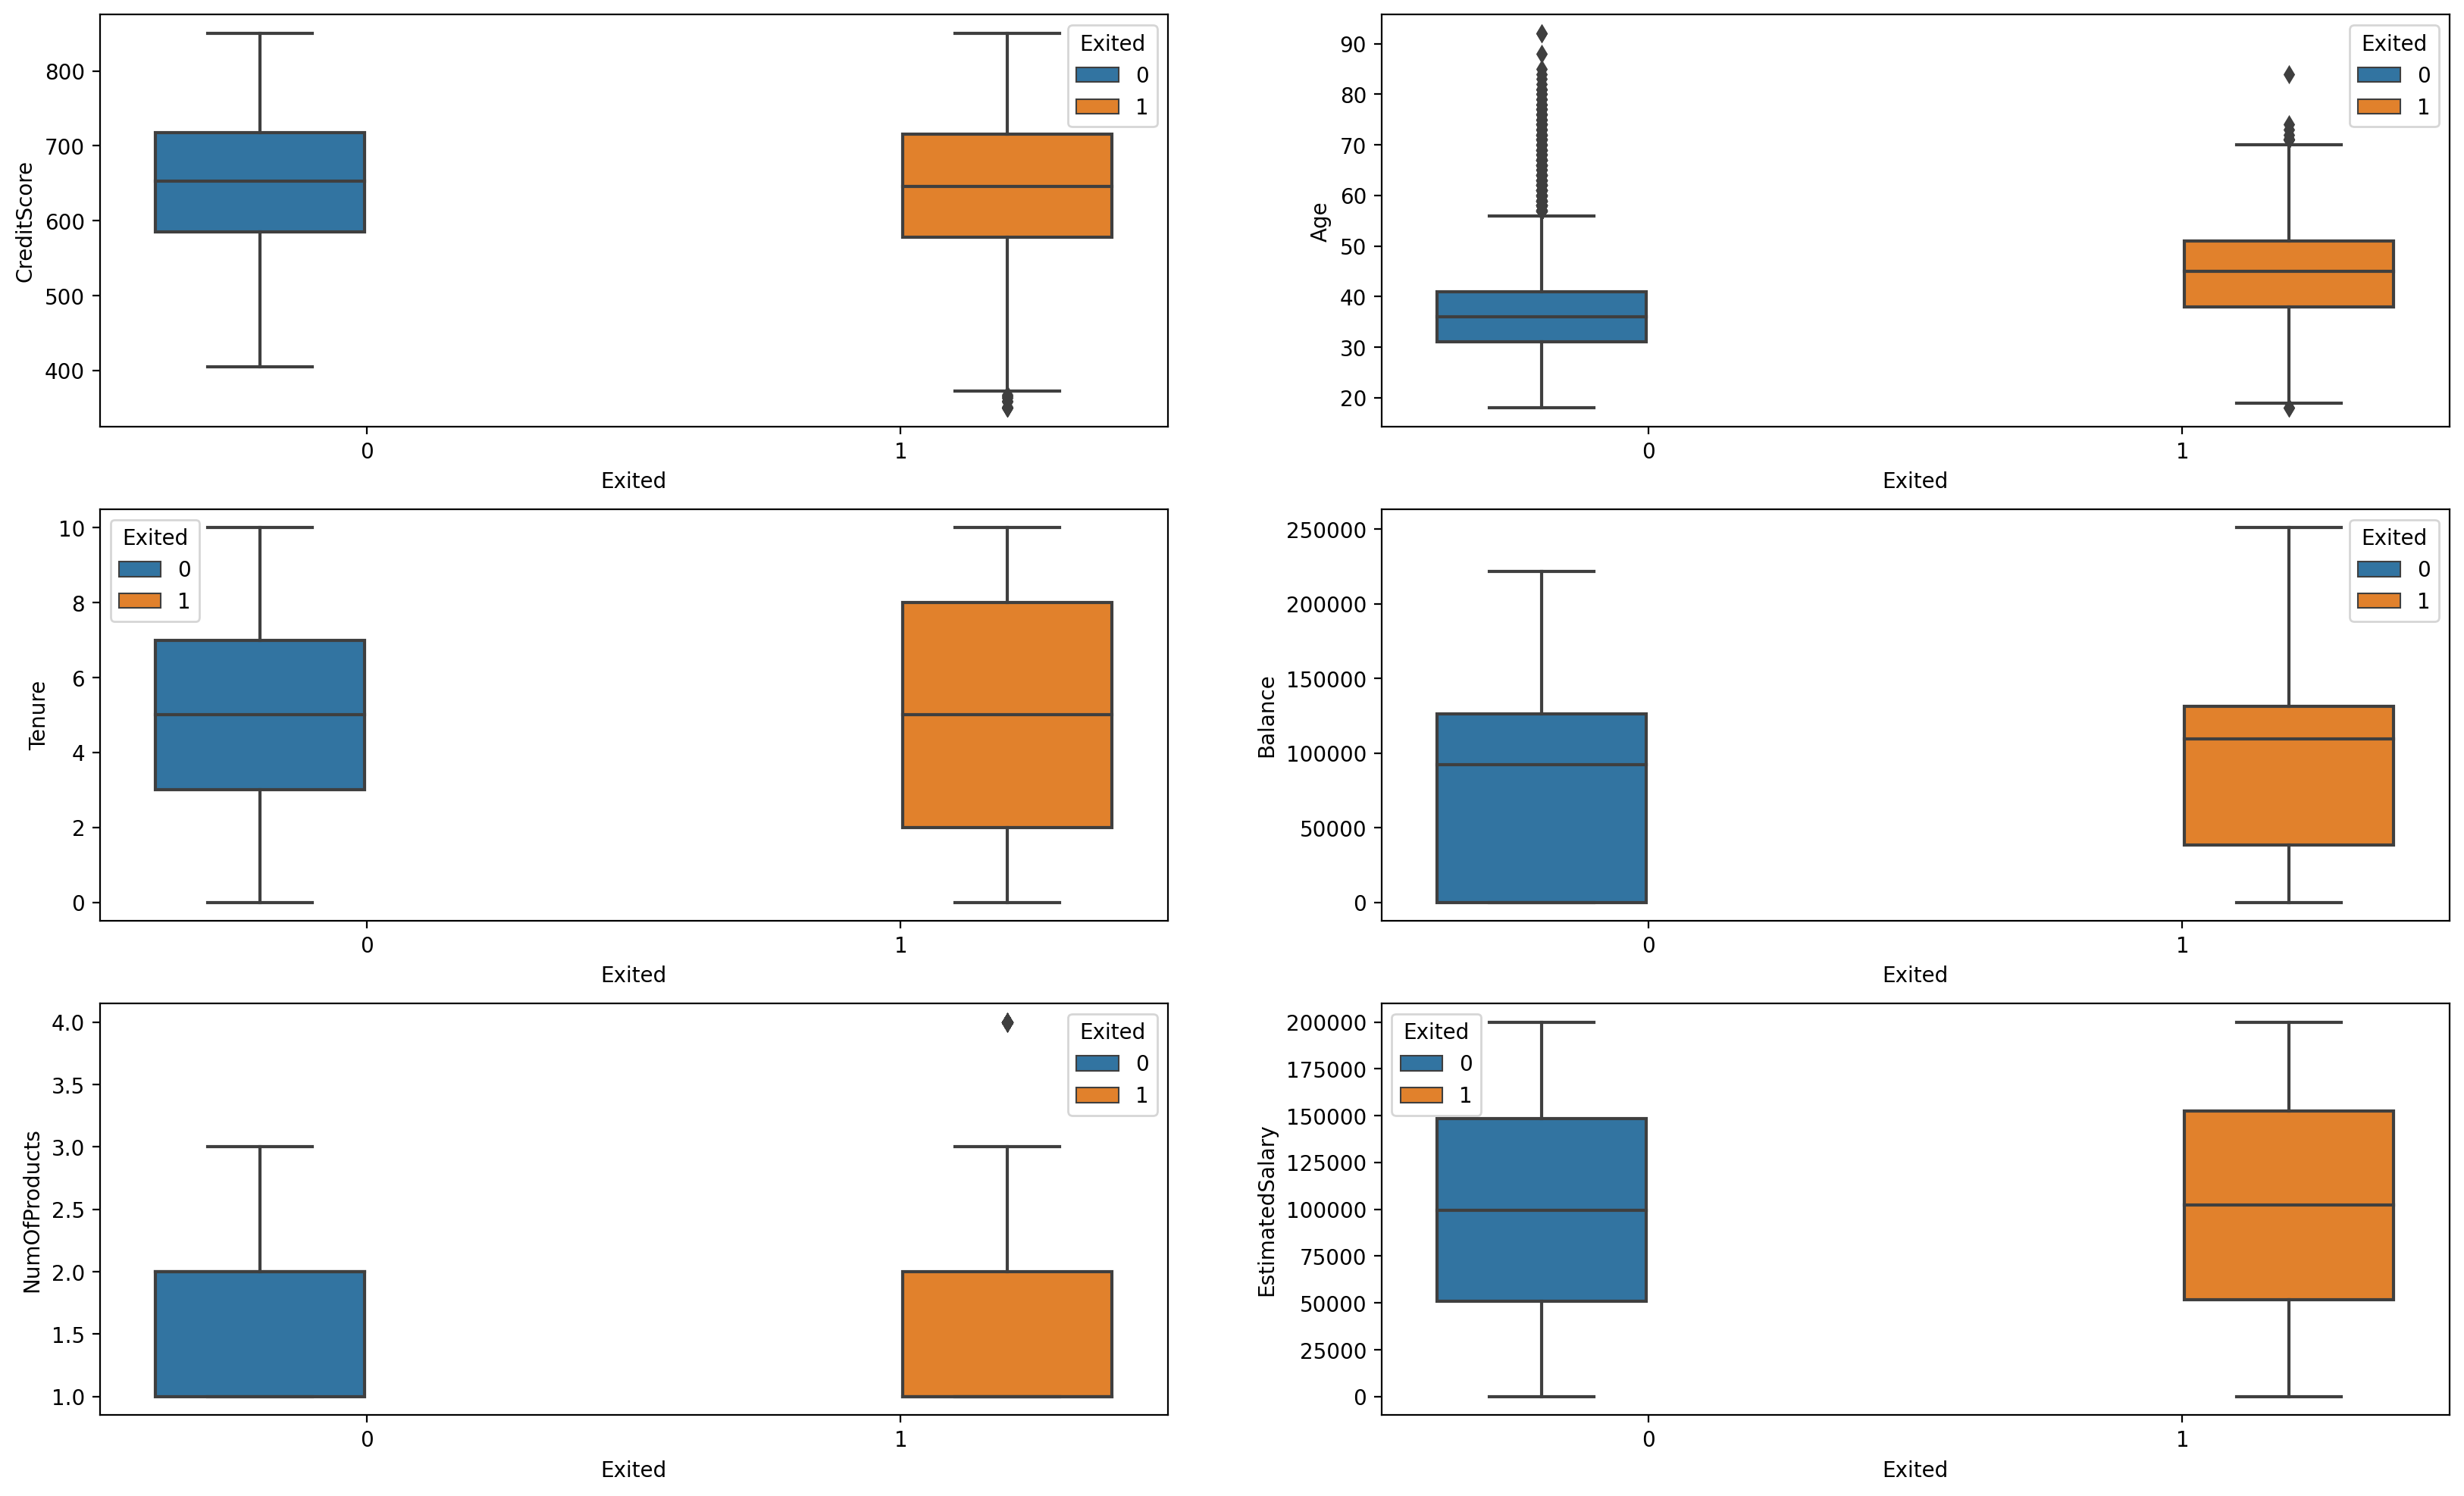

In [193]:
    # Relations based on the continuous data attributes
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = bankdf, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = bankdf , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = bankdf, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = bankdf, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = bankdf, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = bankdf, ax=axarr[2][1])

<Axes: xlabel='Geography', ylabel='count'>

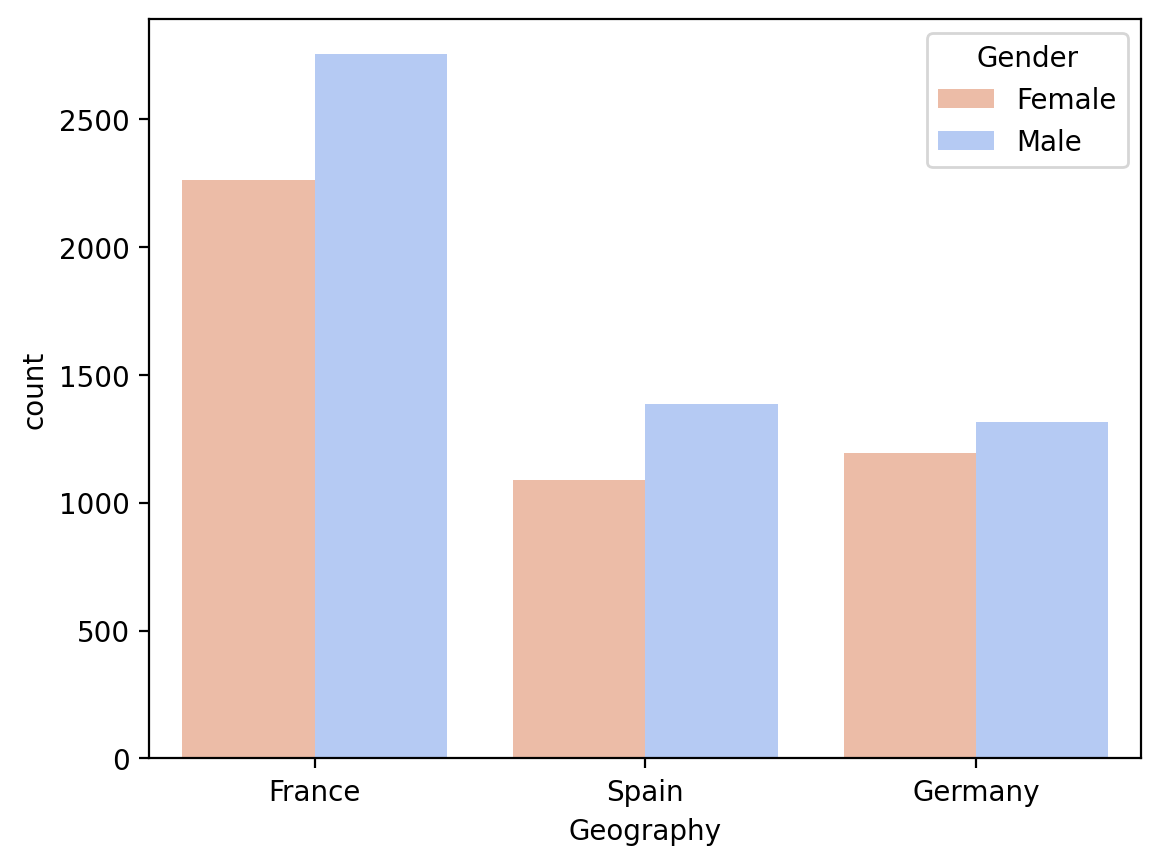

In [194]:
sns.countplot(x='Geography',data=bankdf,hue='Gender',palette="coolwarm_r")

In [195]:
# Support Vector Machine Model
svcmodel = SVC(kernel='linear',random_state=1,probability=True)

# outliers

In [196]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [197]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

In [198]:
# There is no outlier
for var in numeric_variables:
    print(var, "has " , has_outliers(bankdf, [var]),  "Outliers")

CreditScore has  None Outliers
Age has  None Outliers
Balance has  None Outliers
EstimatedSalary has  None Outliers


# One Hot Encoding

In [199]:
# Variables to apply one hot encoding
list = ["Gender", "Geography"]
bankdf = pd.get_dummies(bankdf, columns =list, drop_first = True)

In [200]:
bankdf.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [201]:
# Scale features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [202]:
new_cols_ohe = ["Gender_Male","Geography_Germany","Geography_Spain"]
like_num = [col for col in bankdf.columns if bankdf[col].dtypes != 'O' and len(bankdf[col].value_counts()) <= 10]
cols_need_scale = [col for col in bankdf.columns if col not in new_cols_ohe
                   and col not in "Exited"
                   and col not in like_num]

for col in cols_need_scale:
    bankdf[col] = robust_scaler(bankdf[col])

In [203]:
bankdf.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,-0.450,-0.246,0.417,-0.75,-0.761,1,1,1,0.012,1,False,False,False
1,-0.348,-0.328,0.333,-1.00,-0.105,1,0,1,0.126,0,False,False,True
2,-0.573,-1.119,0.417,0.75,0.489,3,1,0,0.140,1,False,False,False
3,0.085,0.351,0.167,-1.00,-0.761,2,0,0,-0.065,0,False,False,False
4,0.378,1.478,0.500,-0.75,0.222,1,1,1,-0.215,0,False,False,True


In [204]:
print(bankdf.columns)

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Gender_Male', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')


In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [206]:
bankdf.drop(['CustomerId'], axis=1, inplace=True)

In [207]:
# Convert 'Churn' to binary (Yes=1, No=0)
bankdf['CreditScore'] = bankdf['CreditScore'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode categorical variables
bankdf = pd.get_dummies(bankdf, drop_first=True)

In [208]:
# Separate features and target variable
X = bankdf.drop('CreditScore', axis=1)
y = bankdf['CreditScore']

In [211]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample text data
documents = ["This is a sample document.", "Another example text."]

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
X_tfidf = vectorizer.fit_transform(documents)

# Print the shape
print(X_tfidf.shape)  # Check the number of samples in X_tfidf


(2, 7)


In [213]:
print(X_tfidf.shape)  # Check the number of samples in X_tfidf
print(len(y))         # Check the number of samples in y

(2, 7)
10000


In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features
X_train = vectorizer.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

#  Evaluate the Model

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Extract feature importance
importances = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display the most important features
print(importance_df.head(10))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)


In [ ]:
import os

# Specify the file path and name
file_path = 'customer_churn.csv'

# Check if the file already exists
if os.path.exists(file_path):
    overwrite = input("File already exists. Do you want to overwrite? (y/n): ")
    if overwrite.lower() != 'y':
        print("Operation cancelled.")
        exit()

# Save the dataframe to CSV
try:
    bankdf.to_csv(file_path, index=False)
    print(f"Customer segments saved to {file_path} successfully.")
except Exception as e:
    print(f"Error saving customer segments: {str(e)}")

# Conclusion
The customer churn prediction model built using RandomForestClassifier successfully classifies customers who are likely to churn based on key features such as usage patterns, demographics, and customer service interactions. By leveraging this predictive model, businesses can better understand the drivers of churn and take preemptive actions to retain high-risk customers. The insights derived from the analysis empower companies to design targeted retention strategies, thus reducing churn rates and enhancing overall customer satisfaction. The RandomForest model proved effective in handling complex datasets and delivering valuable results in this churn prediction task.